# Import Libraries

In [1]:
import warnings
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import tensorflow as tf
from keras.regularizers import l2  
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, GRU, Input, Concatenate, Flatten,Dropout, Bidirectional, LeakyReLU

# Suppress FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)


# Understand the Data

In [2]:
df = pd.read_csv('Dataset/crop_yield.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [4]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


### Count of Crops

In [5]:
df['Crop'].value_counts()

Crop
Rice                     1197
Maize                     975
Moong(Green Gram)         740
Urad                      733
Groundnut                 725
Sesamum                   685
Potato                    628
Sugarcane                 605
Wheat                     545
Rapeseed &Mustard         528
Bajra                     524
Jowar                     513
Arhar/Tur                 508
Ragi                      498
Gram                      490
Small millets             485
Cotton(lint)              476
Onion                     454
Sunflower                 441
Dry chillies              419
Other Kharif pulses       382
Horse-gram                371
Peas & beans (Pulses)     369
Tobacco                   364
Other  Rabi pulses        355
Soyabean                  349
Turmeric                  337
Masoor                    324
Ginger                    323
Linseed                   308
Castor seed               300
Barley                    297
Sweet potato              273
Garli

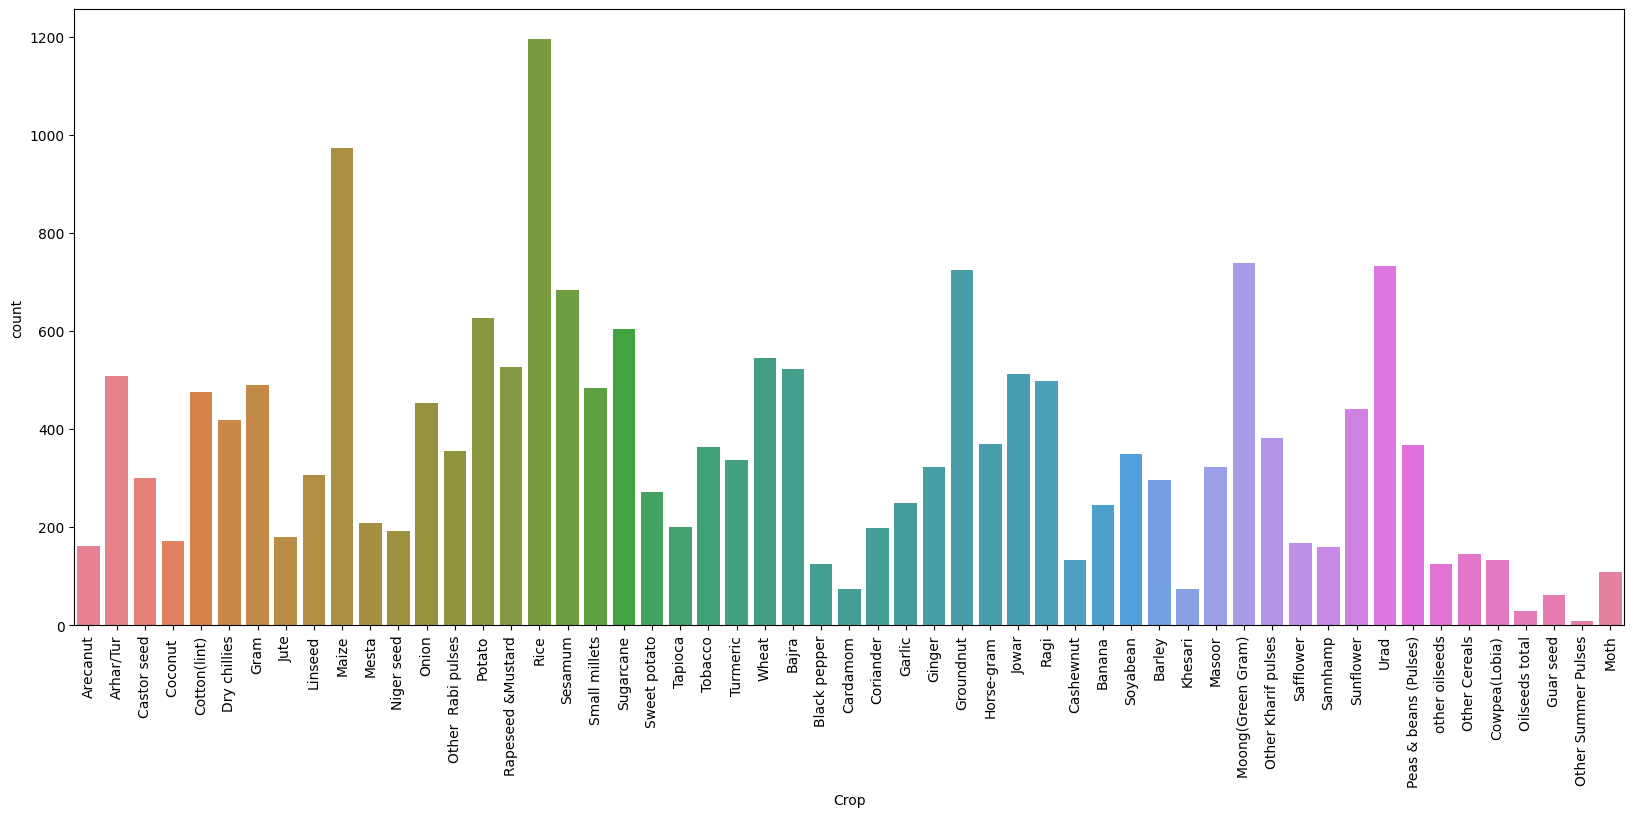

In [6]:
plt.figure(figsize = (20,8))
sns.countplot(x ='Crop', data = df,palette = 'husl' )
plt.xticks(rotation = 90)
plt.show()

### Count of Records by Season

In [7]:
df['Season'].value_counts()

Season
Kharif         8232
Rabi           5742
Whole Year     3717
Summer         1195
Autumn          414
Winter          389
Name: count, dtype: int64

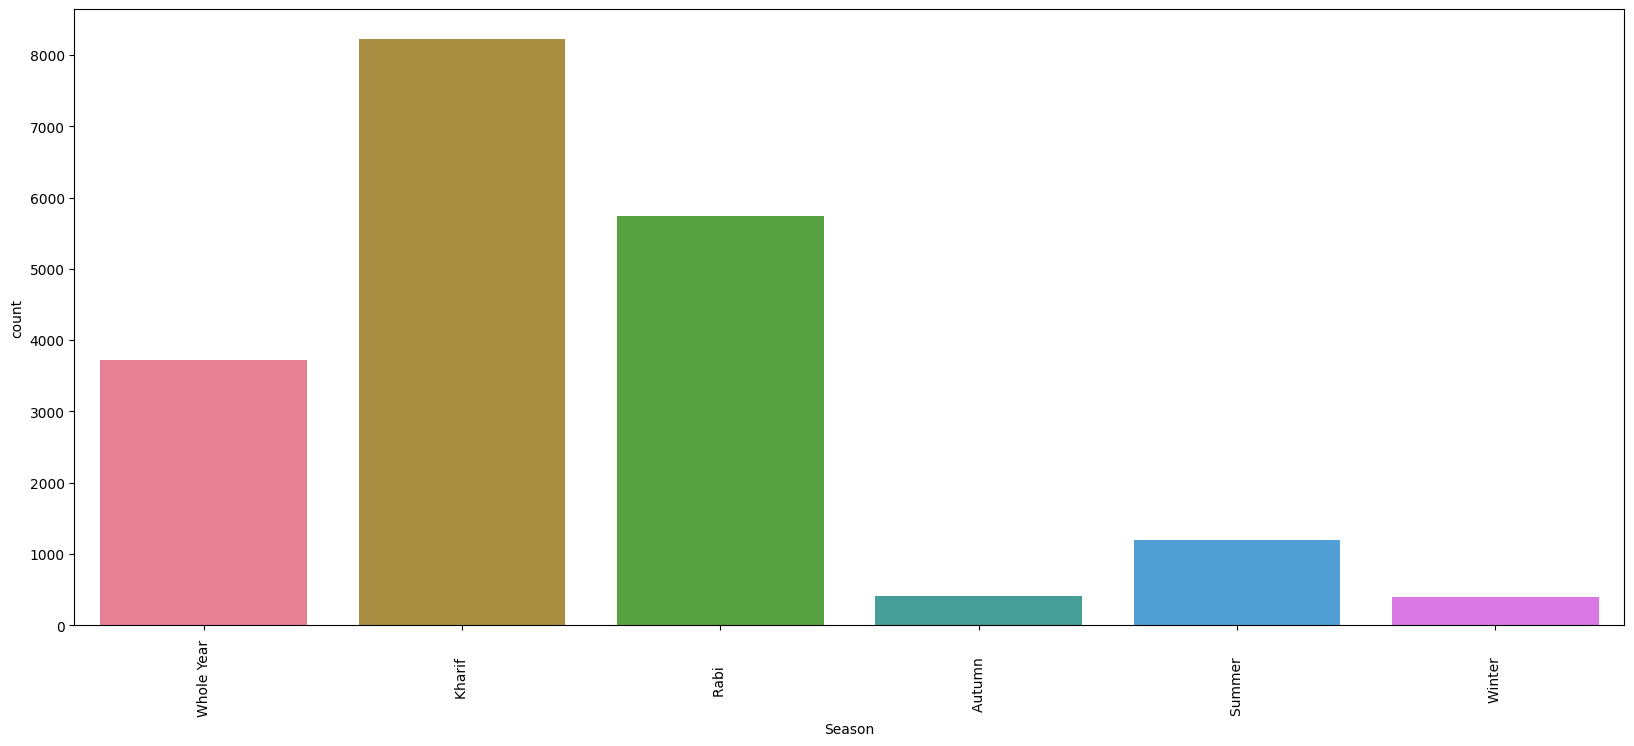

In [8]:
plt.figure(figsize = (20,8))
sns.countplot(x ='Season', data = df,palette = 'husl' )
plt.xticks(rotation = 90)
plt.show()

### Count of Records by State

In [9]:
df['State'].value_counts()

State
Karnataka            1432
Andhra Pradesh       1266
West Bengal          1094
Chhattisgarh          915
Bihar                 896
Madhya Pradesh        845
Uttar Pradesh         825
Tamil Nadu            822
Gujarat               817
Maharashtra           770
Uttarakhand           764
Odisha                760
Assam                 731
Nagaland              689
Puducherry            670
Meghalaya             649
Haryana               631
Jammu and Kashmir     631
Himachal Pradesh      616
Kerala                534
Manipur               444
Tripura               441
Mizoram               416
Telangana             397
Punjab                397
Arunachal Pradesh     292
Jharkhand             270
Goa                   246
Sikkim                226
Delhi                 203
Name: count, dtype: int64

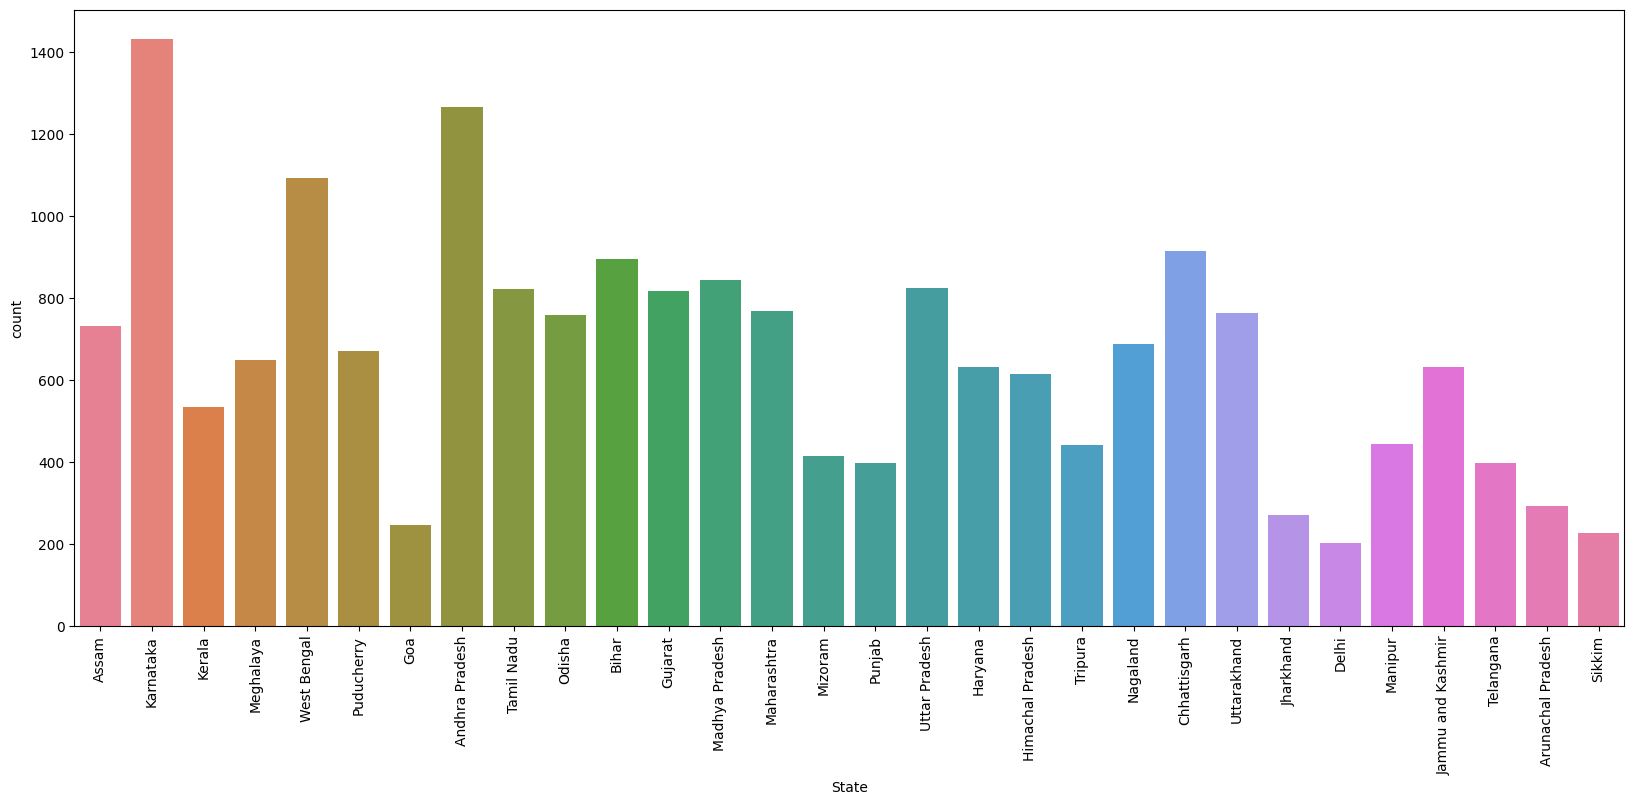

In [10]:
plt.figure(figsize = (20,8))
sns.countplot(x ='State', data = df,palette = 'husl' )
plt.xticks(rotation = 90)
plt.show()

In [11]:
df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
Crop_Year,19689.0,2.009128e+03,6.498000e+00,1997.00,2004.00,2010.00,2.015000e+03,2.020000e+03
Area,19689.0,1.799266e+05,7.328287e+05,0.50,1390.00,9317.00,7.511200e+04,5.080810e+07
Production,19689.0,1.643594e+07,2.630568e+08,0.00,1393.00,13804.00,1.227180e+05,6.326000e+09
Annual_Rainfall,19689.0,1.437755e+03,8.169100e+02,301.30,940.70,1247.60,1.643700e+03,6.552700e+03
Fertilizer,19689.0,2.410331e+07,9.494600e+07,54.17,188014.62,1234957.44,1.000385e+07,4.835407e+09
Pesticide,19689.0,4.884835e+04,2.132874e+05,0.09,356.70,2421.90,2.004170e+04,1.575051e+07
Yield,19689.0,7.995400e+01,8.783060e+02,0.00,0.60,1.03,2.389000e+00,2.110500e+04


In [12]:
df.isnull().sum()


Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [13]:
df.duplicated().sum()


0

# EDA

### Check Corelation

In [14]:
# Selecting only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [15]:
# Correlation matrix
correlation_matrix = numeric_df.corr()

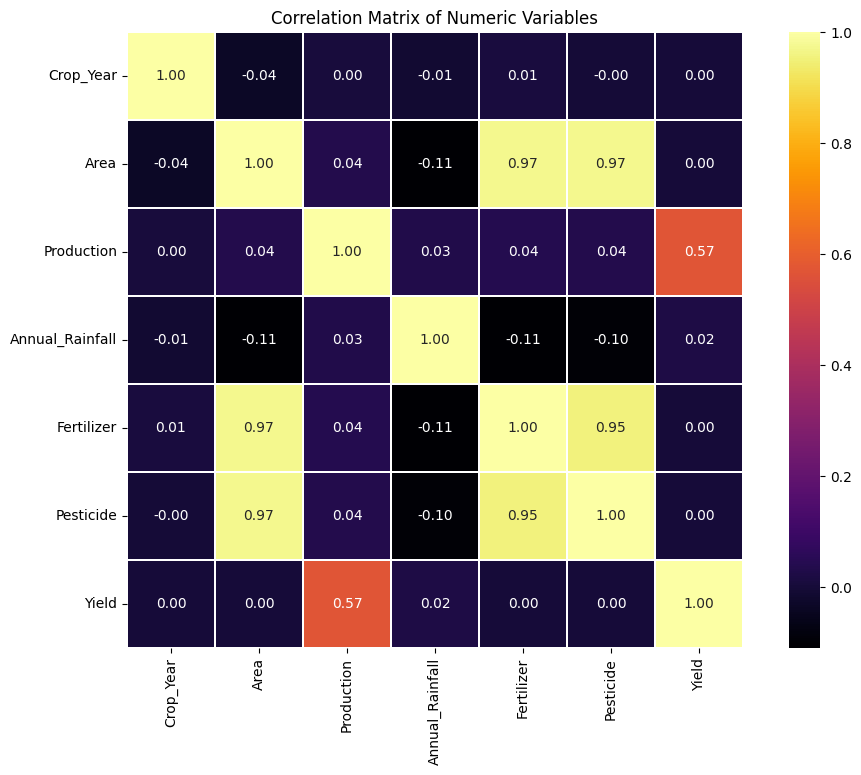

In [16]:
# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", edgecolor = 'white', linewidth = 0.2, cmap='inferno', square=True)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

### Outliers

In [17]:
import pandas as pd

# Assuming your DataFrame is named df
columns_to_check = ['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Yield']

def detect_outliers_iqr(df, columns):
    outlier_info = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
        outlier_info[column] = {
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'num_outliers': len(outliers),
            'outliers': outliers
        }
        
    return outlier_info



In [18]:
# Detect outliers
outlier_results = detect_outliers_iqr(df, columns_to_check)

# Display results
for column, info in outlier_results.items():
    print(f"Column: {column}")
    print(f"Lower Bound: {info['lower_bound']}, Upper Bound: {info['upper_bound']}")
    print(f"Number of Outliers: {info['num_outliers']}\n")
    # Uncomment the line below to see the outlier values
    # print(info['outliers'])


Column: Area
Lower Bound: -109193.0, Upper Bound: 185695.0
Number of Outliers: 3076

Column: Production
Lower Bound: -180594.5, Upper Bound: 304705.5
Number of Outliers: 3373

Column: Annual_Rainfall
Lower Bound: -113.79999999999995, Upper Bound: 2698.2
Number of Outliers: 1527

Column: Fertilizer
Lower Bound: -14535734.250000002, Upper Bound: 24727596.07
Number of Outliers: 3093

Column: Yield
Lower Bound: -2.0833333334999997, Upper Bound: 5.0722222225
Number of Outliers: 3065



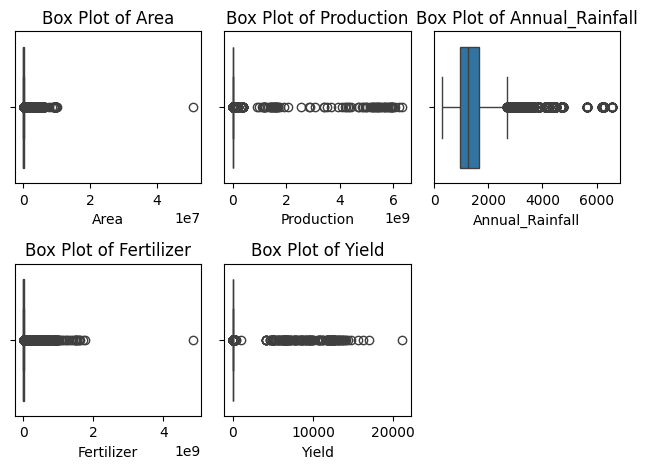

In [19]:
# Create box plots for each column
for i, column in enumerate(columns_to_check):
    # plt.figure(figsize = (15,10))
    plt.subplot(2, 3, i + 1)  # Arrange plots in a 2x3 grid
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [20]:
df['log_Area'] = np.log1p(df['Area'])
df['log_Production'] = np.log1p(df['Production'])
df['log_Fertilizer'] = np.log1p(df['Fertilizer'])

df['log_Pesticide'] = np.log1p(df['Pesticide'])
df['log_Rainfall'] = np.log1p(df['Annual_Rainfall'])

df['Fertilizer_Pesticide'] = df['Fertilizer'] * df['Pesticide']
df['Fertilizer_Rainfall'] = df['Fertilizer'] * df['Annual_Rainfall']
df['log_Yield'] = np.log1p(df['Yield'])



In [21]:
import pandas as pd

# Assuming your DataFrame is named df
columns_to_check = ['log_Area', 'log_Production', 'log_Rainfall', 'log_Fertilizer', 'Yield']

def detect_outliers_iqr(df, columns):
    outlier_info = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
        outlier_info[column] = {
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'num_outliers': len(outliers),
            'outliers': outliers
        }
        
    return outlier_info



In [22]:
# Detect outliers
outlier_results = detect_outliers_iqr(df, columns_to_check)

# Display results
for column, info in outlier_results.items():
    print(f"Column: {column}")
    print(f"Lower Bound: {info['lower_bound']}, Upper Bound: {info['upper_bound']}")
    print(f"Number of Outliers: {info['num_outliers']}\n")
    # Uncomment the line below to see the outlier values
    # print(info['outliers'])


Column: log_Area
Lower Bound: 1.2543220918560989, Upper Bound: 17.210205025369017
Number of Outliers: 183

Column: log_Production
Lower Bound: 0.5233527763958943, Upper Bound: 18.43423228286143
Number of Outliers: 277

Column: log_Rainfall
Lower Bound: 6.011246967669209, Upper Bound: 8.241753060594032
Number of Outliers: 942

Column: log_Fertilizer
Lower Bound: 6.182980213266594, Upper Bound: 22.079780507134593
Number of Outliers: 245

Column: Yield
Lower Bound: -2.0833333334999997, Upper Bound: 5.0722222225
Number of Outliers: 3065



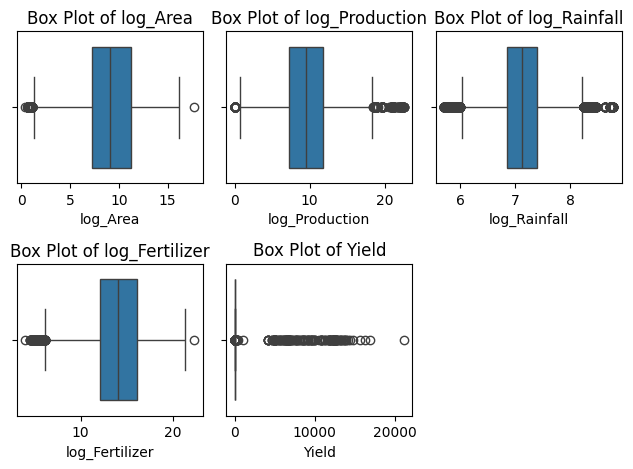

In [23]:
# Create box plots for each column
for i, column in enumerate(columns_to_check):
    # plt.figure(figsize = (15,10))
    plt.subplot(2, 3, i + 1)  # Arrange plots in a 2x3 grid
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### Summary Statistics

In [24]:
# Summary statistics for numeric columns
summary_stats = df.describe()
summary_stats.head()


,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,log_Area,log_Production,log_Fertilizer,log_Pesticide,log_Rainfall,Fertilizer_Pesticide,Fertilizer_Rainfall,log_Yield
count,19689.000000,19689.000000,1.968900e+04,19689.000000,1.968900e+04,19689.000000,19689.000000,19689.000000,19689.000000,19689.000000,19689.000000,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,179926.570308,1.643594e+07,1437.755177,2.410331e+07,48848.353392,79.954009,9.065974,9.432032,13.956683,7.746047,7.141175,2.051575e+13,2.614389e+10,1.081109
std,6.498099,732828.675888,2.630568e+08,816.909589,9.494600e+07,213287.354860,878.306193,2.958580,3.475852,2.971847,2.919683,0.504548,5.672690e+14,1.131653e+11,1.135903
min,1997.000000,0.500000,0.000000e+00,301.300000,5.417000e+01,0.090000,0.000000,0.405465,0.000000,4.010419,0.086178,5.711420,5.687850e+00,3.883297e+04,0.000000
25%,2004.000000,1390.000000,1.393000e+03,940.700000,1.880146e+05,356.700000,0.600000,7.237778,7.239933,12.144280,5.879695,6.847687,6.772305e+07,2.621840e+08,0.470004


### Distribution of Key Variables

### Correlation Analysis

In [25]:
# Selecting only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [26]:
# Correlation matrix
correlation_matrix = numeric_df.corr()

In [27]:
correlation_matrix.T.head()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,log_Area,log_Production,log_Fertilizer,log_Pesticide,log_Rainfall,Fertilizer_Pesticide,Fertilizer_Rainfall,log_Yield
Crop_Year,1.000000,-0.035686,0.003366,-0.011187,0.011169,-0.004657,0.002539,-0.106848,-0.066105,-0.045523,-0.058828,0.018743,-0.004943,0.011401,0.040259
Area,-0.035686,1.000000,0.037441,-0.106054,0.973255,0.973479,0.001858,0.413419,0.371653,0.410367,0.416570,-0.113502,0.672810,0.933841,0.021524
Production,0.003366,0.037441,1.000000,0.029879,0.039799,0.035171,0.570809,0.083530,0.221917,0.083674,0.083971,0.027593,0.001895,0.079596,0.419581
Annual_Rainfall,-0.011187,-0.106054,0.029879,1.000000,-0.109734,-0.097657,0.020761,-0.207886,-0.148167,-0.208513,-0.206381,0.924984,-0.012363,-0.045948,0.042089
Fertilizer,0.011169,0.973255,0.039799,-0.109734,1.000000,0.954991,0.002862,0.426665,0.385943,0.427111,0.431061,-0.116396,0.571837,0.923542,0.026757


In [28]:
numeric_df = df[['log_Yield', 'log_Area',
       'log_Production', 'log_Fertilizer', 'log_Pesticide', 'log_Rainfall',
       'Fertilizer_Pesticide', 'Fertilizer_Rainfall']]

In [29]:
correlation_matrix = numeric_df.corr()

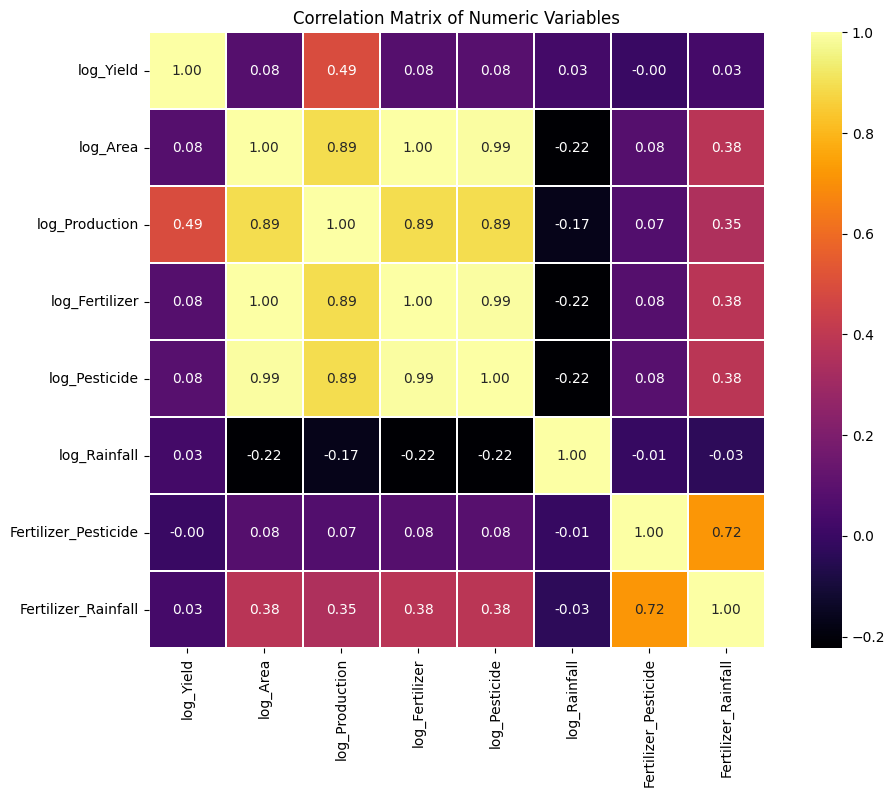

In [30]:
# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", edgecolor = 'white', linewidth = 0.2, cmap='inferno', square=True)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

In [31]:
# print(abid)

### Crop Performance by State and Year

In [32]:
# Grouping by State and Crop to find average yield for each crop in each state
state_crop_performance = df.groupby(['State', 'Crop'])['Yield'].mean().reset_index()

# Displaying the average yield for each crop in all states
state_crop_performance




,State,Crop,Yield
0,Andhra Pradesh,Arecanut,2.211056
1,Andhra Pradesh,Arhar/Tur,0.490919
2,Andhra Pradesh,Bajra,1.252450
3,Andhra Pradesh,Banana,39.964567
4,Andhra Pradesh,Black pepper,0.875000
...,...,...,...
990,West Bengal,Sunflower,1.080542
991,West Bengal,Tobacco,0.974103
992,West Bengal,Turmeric,1.784537
993,West Bengal,Urad,0.674124


In [33]:
# If you want to find the top crops in each state
top_crops_all_states = state_crop_performance.loc[state_crop_performance.groupby('State')['Yield'].idxmax()]

# Display the top crop for each state
print(top_crops_all_states)

                 State       Crop         Yield
7       Andhra Pradesh   Coconut   11734.825149
63   Arunachal Pradesh  Sugarcane     18.955751
74               Assam   Coconut    7185.238140
136              Bihar  Sugarcane     48.321514
144       Chhattisgarh      Bajra     17.100958
197              Delhi  Sugarcane     69.290625
203                Goa   Coconut    5042.722647
214            Gujarat     Banana     66.067491
273            Haryana  Sugarcane     54.581250
310   Himachal Pradesh  Sugarcane     12.509461
339  Jammu and Kashmir     Potato     10.321127
376          Jharkhand  Sugarcane     32.197481
388          Karnataka   Coconut    6627.822040
431             Kerala   Coconut    6270.147795
464     Madhya Pradesh     Banana     34.032173
531        Maharashtra  Sugarcane     67.989888
559            Manipur  Sugarcane     41.726640
567          Meghalaya     Banana     10.640247
616            Mizoram  Sugarcane     14.184186
654           Nagaland  Sugarcane     39

### Bar Plot for Average Yield by State and Crop

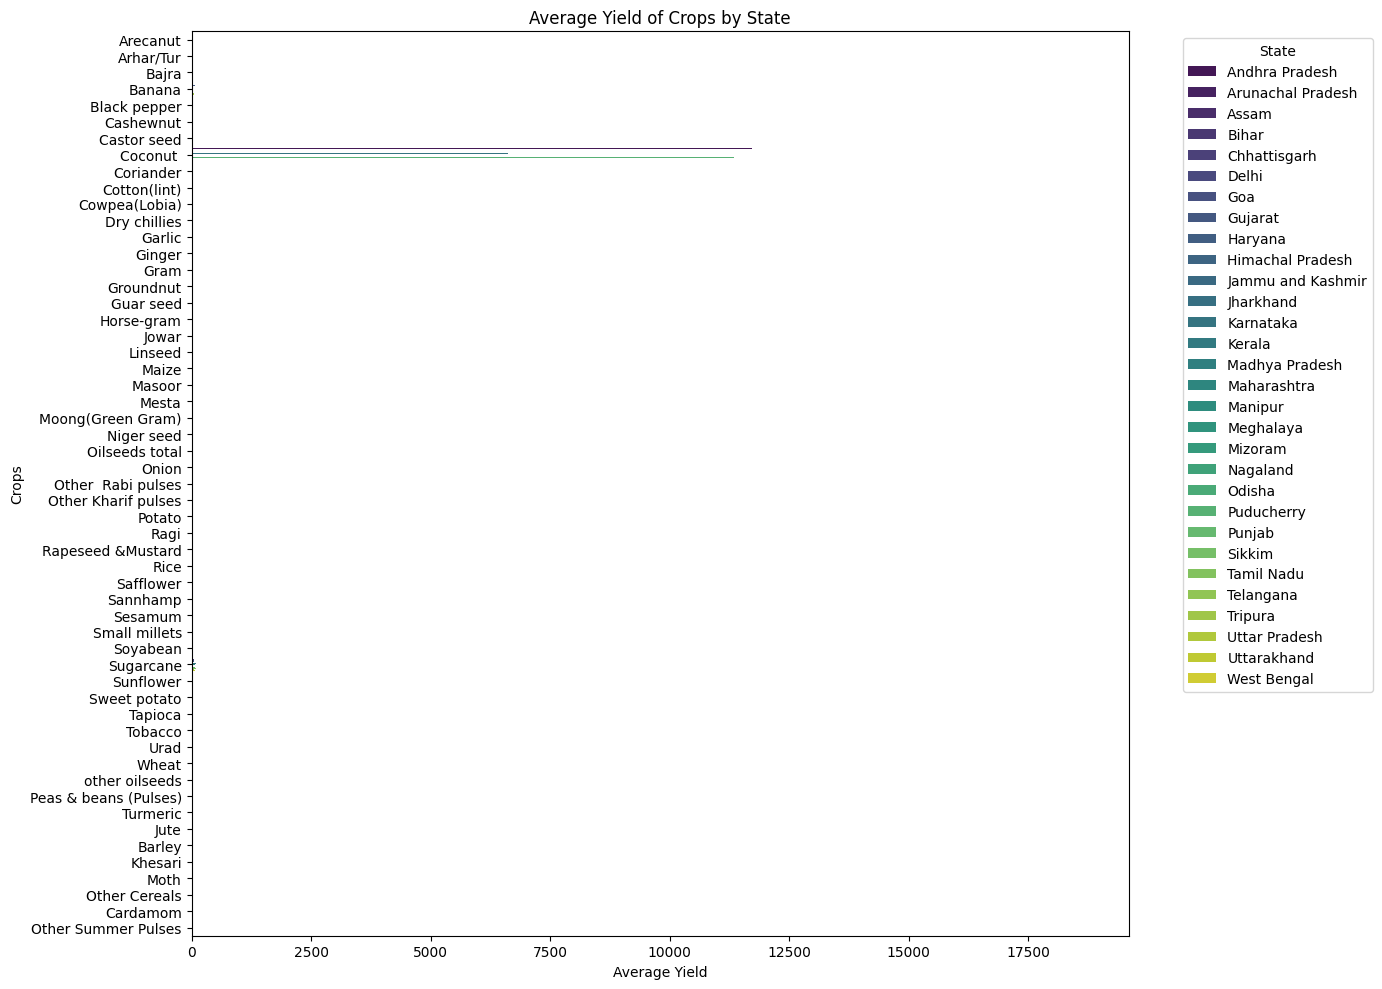

In [34]:


# Setting the figure size
plt.figure(figsize=(14, 10))

# Creating a bar plot for average yield by crop and state
sns.barplot(data=state_crop_performance, x='Yield', y='Crop', hue='State', estimator='mean', palette='viridis')

plt.title('Average Yield of Crops by State')
plt.xlabel('Average Yield')
plt.ylabel('Crops')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Impact of Rainfall, Fertilizer, and Pesticide on Yield

C:\Users\HP\AppData\Local\Temp\ipykernel_3176\329944745.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


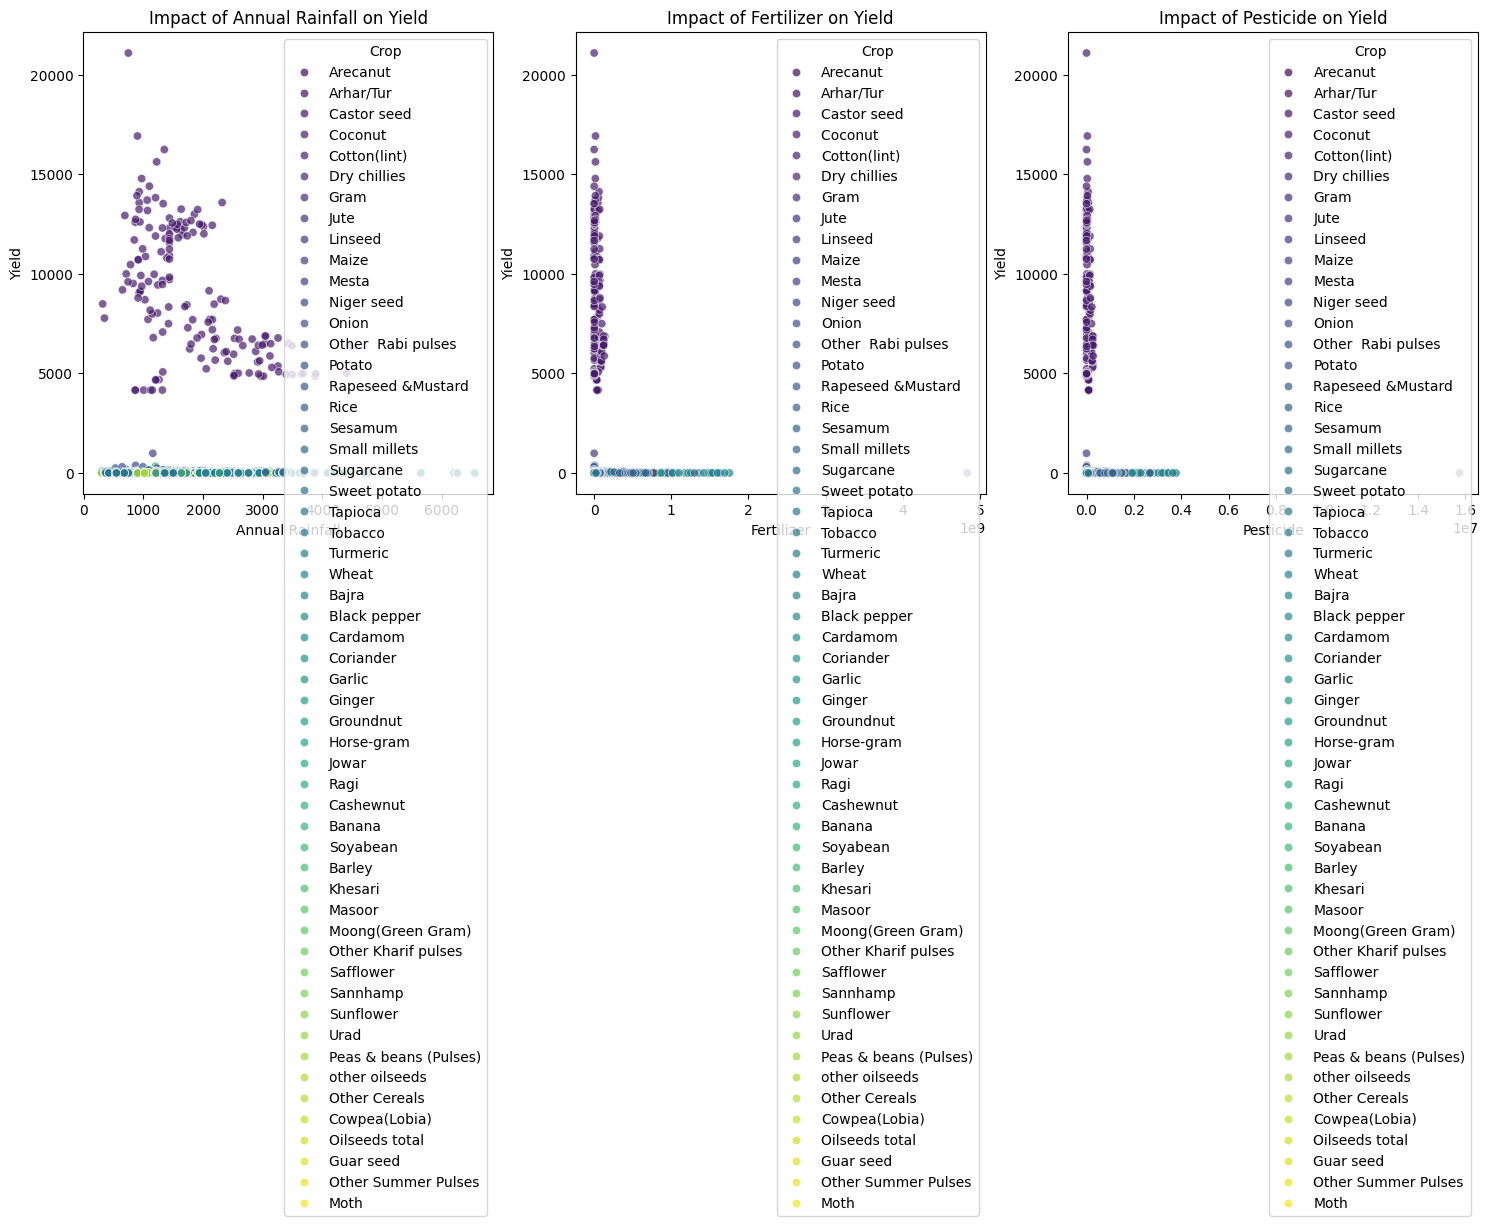

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot for Rainfall vs Yield colored by Crop
sns.scatterplot(x='Annual_Rainfall', y='Yield', data=df, hue='Crop', palette='viridis', alpha=0.7, ax=axs[0])
axs[0].set_title('Impact of Annual Rainfall on Yield')
axs[0].set_xlabel('Annual Rainfall')
axs[0].set_ylabel('Yield')

# Scatter plot for Fertilizer vs Yield colored by Crop
sns.scatterplot(x='Fertilizer', y='Yield', data=df, hue='Crop', palette='viridis', alpha=0.7, ax=axs[1])
axs[1].set_title('Impact of Fertilizer on Yield')
axs[1].set_xlabel('Fertilizer')
axs[1].set_ylabel('Yield')

# Scatter plot for Pesticide vs Yield colored by Crop
sns.scatterplot(x='Pesticide', y='Yield', data=df, hue='Crop', palette='viridis', alpha=0.7, ax=axs[2])
axs[2].set_title('Impact of Pesticide on Yield')
axs[2].set_xlabel('Pesticide')
axs[2].set_ylabel('Yield')

plt.tight_layout()
plt.show()


### Top States by Total Crop Yield

In [36]:
df_state = df.groupby('State').sum()
df_state.sort_values(by = 'Yield', inplace=True, ascending = False)
df_state.head()

,Crop,Crop_Year,Season,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,log_Area,log_Production,log_Fertilizer,log_Pesticide,log_Rainfall,Fertilizer_Pesticide,Fertilizer_Rainfall,log_Yield
State,,,,,,,,,,,,,,,,,
West Bengal,ArecanutArhar/TurBajraBarleyCardamomCastor see...,2196856,Whole Year Whole Year Kharif Whole Year Wh...,2.376823e+08,8941179120,1.883456e+06,2.970480e+10,6.612665e+07,291986.752179,10009.374932,10576.539099,15339.064232,8527.137890,8138.647341,9.175807e+16,5.149805e+13,1260.220884
Puducherry,ArecanutBajraBlack pepperCorianderCotton(lint)...,1346899,Kharif Kharif Kharif Kharif Su...,6.535410e+05,493815573,9.599160e+05,8.480729e+07,1.705159e+05,232163.600840,2694.665143,3383.358597,5912.608669,1952.483296,4863.923157,2.156037e+11,1.219594e+11,1050.673034
Andhra Pradesh,ArecanutArhar/TurArhar/TurBajraBajraBananaCash...,2543550,Whole Year Kharif Rabi Kharif Ra...,2.389253e+08,26076218605,1.160140e+06,3.125890e+10,6.210724e+07,229735.184723,12830.147909,13376.794363,19023.755305,11158.162585,8617.106864,8.445602e+15,2.896688e+13,1533.691488
Tamil Nadu,ArecanutArhar/TurBajraBananaCashewnutCastor se...,1652030,Whole Year Kharif Kharif Whole Year Wh...,1.103728e+08,78051759253,7.654142e+05,1.473239e+10,2.956305e+07,185813.281648,8375.621657,8898.884456,12411.564686,7292.123730,5583.102399,3.134131e+15,1.383930e+13,1160.758224
Assam,ArecanutArhar/TurCastor seedCoconut Cotton(lin...,1468138,Whole Year Kharif Kharif Whole Year Kh...,7.734260e+07,3637714928,1.531493e+06,1.029304e+10,2.093547e+07,160612.648362,7151.242242,7599.154305,10720.506398,6161.781111,5586.037977,3.057343e+15,2.158066e+13,921.964050


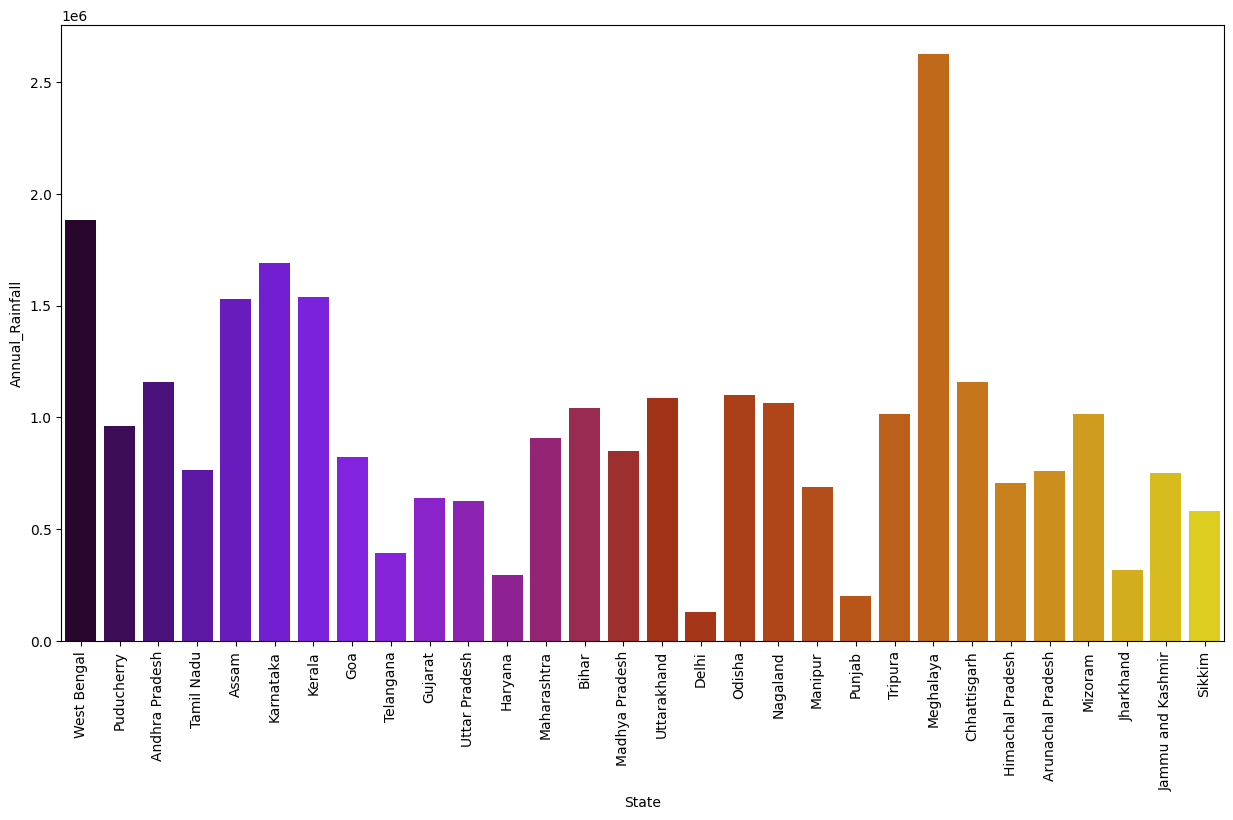

In [37]:
plt.figure(figsize = (15,8))
sns.barplot(x = df_state.index, y=df_state['Annual_Rainfall'], palette = 'gnuplot') 
plt.xticks(rotation = 90)
plt.show()

### Year-wise Total Yield and Production Excluding 2020

In [38]:
df_year = df[df['Crop_Year']!=2020]
year_yield = df_year.groupby('Crop_Year').sum() 
year_yield.head()

,Crop,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,log_Area,log_Production,log_Fertilizer,log_Pesticide,log_Rainfall,Fertilizer_Pesticide,Fertilizer_Rainfall,log_Yield
Crop_Year,,,,,,,,,,,,,,,,,
1997,ArecanutArhar/TurCastor seedCoconut Cotton(lin...,Whole Year Kharif Kharif Whole Year Kh...,AssamAssamAssamAssamAssamAssamAssamAssamAssamA...,1.660686e+08,6087009873,6.542691e+05,1.580475e+10,5.148126e+07,26187.756592,4143.306355,4219.553935,6008.140184,3667.784970,2963.069241,8.469131e+16,2.046354e+13,407.797509
1998,ArecanutBajraBlack pepperCorianderCotton(lint)...,Kharif Kharif Kharif Kharif Su...,PuducherryPuducherryPuducherryPuducherryPuduch...,1.501238e+08,7868086697,1.138474e+06,1.483223e+10,4.353590e+07,36136.246483,6110.349048,6321.590454,9074.245287,5316.827489,4721.458280,1.075029e+16,1.699778e+13,679.496123
1999,ArecanutArhar/TurBananaCastor seedCoconut Cott...,Whole Year Kharif Whole Year Kharif Wh...,AssamAssamAssamAssamAssamAssamAssamAssamAssamA...,1.470574e+08,8550025528,1.033857e+06,1.560720e+10,3.970550e+07,50013.419395,6335.422805,6542.245112,9364.777944,5489.678124,4655.428854,1.020171e+16,1.760792e+13,687.139730
2000,ArecanutArhar/TurArhar/TurBajraBajraBananaCash...,Whole Year Kharif Rabi Kharif Ra...,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,1.475277e+08,9562470060,1.119624e+06,1.448280e+10,3.835721e+07,58342.279827,7260.702174,7428.045727,10797.803476,6228.520136,5471.604639,8.349708e+15,1.453401e+13,776.067009
2001,ArecanutArhar/TurArhar/TurBajraBajraBananaCash...,Whole Year Kharif Rabi Kharif Ra...,Andhra PradeshAndhra PradeshAndhra PradeshAndh...,1.456943e+08,9314563490,1.055077e+06,1.487976e+10,3.788053e+07,56581.195447,7030.222540,7218.632454,10495.976270,6027.824189,5347.178632,9.019594e+15,1.552318e+13,757.309561


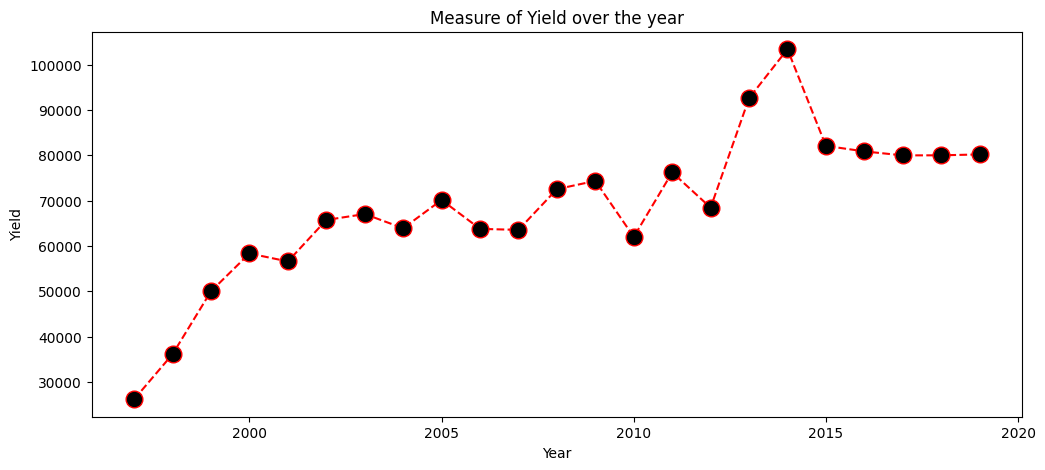

In [39]:
plt.figure(figsize = (12,5))
plt.plot(year_yield.index, year_yield['Yield'],color='red', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='black')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Measure of Yield over the year')
plt.show()

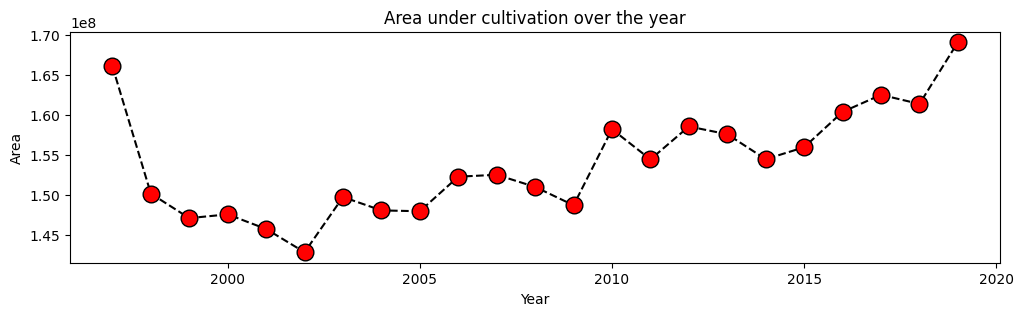

In [40]:
plt.figure(figsize = (12,3))
plt.plot(year_yield.index, year_yield['Area'],color='black', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='red')
plt.xlabel('Year')
plt.ylabel('Area')
plt.title('Area under cultivation over the year')
plt.show()

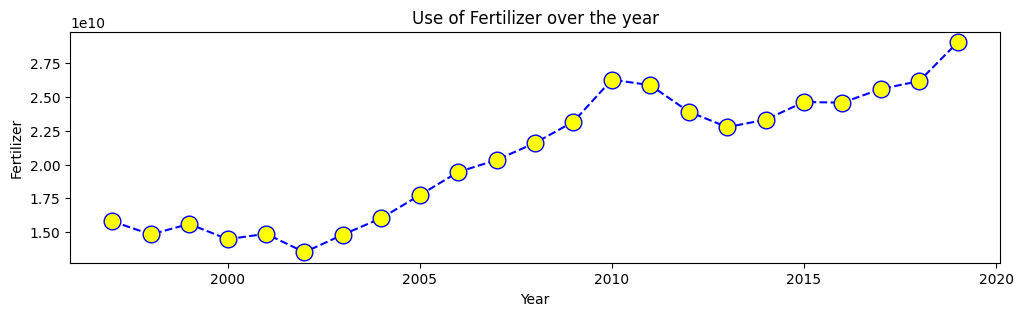

In [41]:
plt.figure(figsize = (12,3))
plt.plot(year_yield.index, year_yield['Fertilizer'],color='blue', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Fertilizer')
plt.title('Use of Fertilizer over the year')
plt.show()

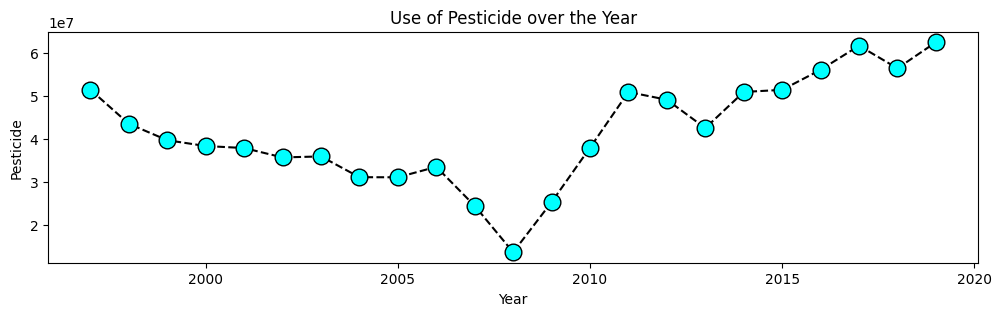

In [42]:
plt.figure(figsize = (12,3))
plt.plot(year_yield.index, year_yield['Pesticide'],color='black', linestyle='dashed', marker='o', 
        markersize=12, markerfacecolor='cyan')
plt.xlabel('Year')
plt.ylabel('Pesticide')
plt.title('Use of Pesticide over the Year')
plt.show()

### Split the data

In [43]:
df = pd.get_dummies(df, columns=['Crop', 'Season', 'State'], drop_first=True)


In [44]:
df.columns

Index(['Crop_Year', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer',
       'Pesticide', 'Yield', 'log_Area', 'log_Production', 'log_Fertilizer',
       ...
       'State_Odisha', 'State_Puducherry', 'State_Punjab', 'State_Sikkim',
       'State_Tamil Nadu', 'State_Telangana', 'State_Tripura',
       'State_Uttar Pradesh', 'State_Uttarakhand', 'State_West Bengal'],
      dtype='object', length=103)

In [45]:
df = df.drop('Area', axis=1)
df = df.drop('Production', axis=1)
df = df.drop('Fertilizer', axis=1)
df = df.drop('Pesticide', axis=1)
df = df.drop('Annual_Rainfall', axis=1)
df = df.drop('Yield', axis=1)


In [46]:
df.head()

,Crop_Year,log_Area,log_Production,log_Fertilizer,log_Pesticide,log_Rainfall,Fertilizer_Pesticide,Fertilizer_Rainfall,log_Yield,Crop_Arhar/Tur,...,State_Odisha,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal
0,1997,11.209317,10.945688,15.764969,10.038164,7.626765,1.607457e+11,1.441084e+10,0.585610,False,...,False,False,False,False,False,False,False,False,False,False
1,1997,8.800566,8.452335,13.356082,7.629718,7.626765,1.299587e+09,1.295753e+09,0.536748,True,...,False,False,False,False,False,False,False,False,False,False
2,1997,6.680855,3.135494,11.235277,5.512461,7.626765,1.869338e+07,1.554045e+08,0.213766,False,...,False,False,False,False,False,False,False,False,False,False
3,1997,9.886189,18.658949,14.441803,8.715119,7.626765,1.139861e+10,3.837475e+09,8.563896,False,...,False,False,False,False,False,False,False,False,False,False
4,1997,7.461640,6.678342,12.016736,6.291736,7.626765,8.921973e+07,3.395080e+08,0.351297,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 97 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Crop_Year                   19689 non-null  int64  
 1   log_Area                    19689 non-null  float64
 2   log_Production              19689 non-null  float64
 3   log_Fertilizer              19689 non-null  float64
 4   log_Pesticide               19689 non-null  float64
 5   log_Rainfall                19689 non-null  float64
 6   Fertilizer_Pesticide        19689 non-null  float64
 7   Fertilizer_Rainfall         19689 non-null  float64
 8   log_Yield                   19689 non-null  float64
 9   Crop_Arhar/Tur              19689 non-null  bool   
 10  Crop_Bajra                  19689 non-null  bool   
 11  Crop_Banana                 19689 non-null  bool   
 12  Crop_Barley                 19689 non-null  bool   
 13  Crop_Black pepper           196

In [48]:
# Assuming 'df' is your cleaned dataset
X = df.drop('log_Yield', axis=1).values  # Replace 'Yield' with your target variable
y = df['log_Yield'].values

In [49]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
# Reshape input for GRU
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [52]:
X_train_reshaped.shape

(15751, 96, 1)

# Model

### MLP-GRU

In [53]:

# Reshape input for GRU
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Input layer for the GRU
gru_input = Input(shape=(X_train.shape[1], 1))
gru_output = GRU(64, return_sequences=False)(gru_input)

# Input layer for the MLP
mlp_input = Input(shape=(X_train.shape[1],))
mlp_output = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(mlp_input)  # Add L2 regularization
mlp_output = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(mlp_output)  # Add L2 regularization

# Combine GRU and MLP outputs
combined = Concatenate()([gru_output, mlp_output])

# Add more dense layers after combining
combined_output = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(combined)  # L2 regularization
combined_output = Dense(16, activation='relu', kernel_regularizer=l2(0.01))(combined_output)  # L2 regularization

# Final output layer without activation
final_output = Dense(1)(combined_output)



In [54]:
model = Model(inputs=[gru_input, mlp_input], outputs=final_output)


In [55]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 96)]                 0         []                            
                                                                                                  
 input_1 (InputLayer)        [(None, 96, 1)]              0         []                            
                                                                                                  
 dense (Dense)               (None, 64)                   6208      ['input_2[0][0]']             
                                                                                                  
 gru (GRU)                   (None, 64)                   12864     ['input_1[0][0]']             
                                                                                              

In [56]:

# Define the callbacks
checkpoint_callback = ModelCheckpoint(
    'best_model.h5',  # Filepath to save the model
    monitor='val_loss',  # Metric to monitor
    save_best_only=True,  # Save only the best model
    mode='min',  # Minimize the monitored metric
    verbose=1
)

early_stopping_callback = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=10,  # Number of epochs with no improvement before stopping
    mode='min',  # Minimize the monitored metric
    verbose=1,
    restore_best_weights=True  # Restore the weights of the best model at the end of training
)

reduce_lr_callback = ReduceLROnPlateau(
    monitor='val_loss',  # Metric to monitor
    factor=0.2,  # Factor by which to reduce the learning rate
    patience=5,  # Number of epochs with no improvement before reducing
    min_lr=1e-6,  # Lower bound on the learning rate
    verbose=1
)

# Train the model with callbacks
history = model.fit(
    [X_train_reshaped, X_train], y_train, 
    validation_data=([X_test_reshaped, X_test], y_test),
    epochs=50, 
    batch_size=32, 
    verbose=1,
    callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]
)

Epoch 1/50


493/493 [==============================] - ETA: 0s - loss: 1.0468 - mae: 0.2727
Epoch 1: val_loss improved from inf to 0.41630, saving model to best_model.h5


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


493/493 [==============================] - 58s 103ms/step - loss: 1.0468 - mae: 0.2727 - val_loss: 0.4163 - val_mae: 0.1594 - lr: 0.0010
Epoch 2/50
493/493 [==============================] - ETA: 0s - loss: 0.2845 - mae: 0.1429
Epoch 2: val_loss improved from 0.41630 to 0.20048, saving model to best_model.h5
493/493 [==============================] - 46s 93ms/step - loss: 0.2845 - mae: 0.1429 - val_loss: 0.2005 - val_mae: 0.1514 - lr: 0.0010
Epoch 3/50
493/493 [==============================] - ETA: 0s - loss: 0.1572 - mae: 0.1187
Epoch 3: val_loss improved from 0.20048 to 0.12446, saving model to best_model.h5
493/493 [==============================] - 51s 103ms/step - loss: 0.1572 - mae: 0.1187 - val_loss: 0.1245 - val_mae: 0.1111 - lr: 0.0010
Epoch 4/50
493/493 [==============================] - ETA: 0s - loss: 0.1159 - mae: 0.1119
Epoch 4: val_loss improved from 0.12446 to 0.10062, saving model to best_model.h5
493/493 [==============================] - 46s 94ms/step - loss: 0.1159

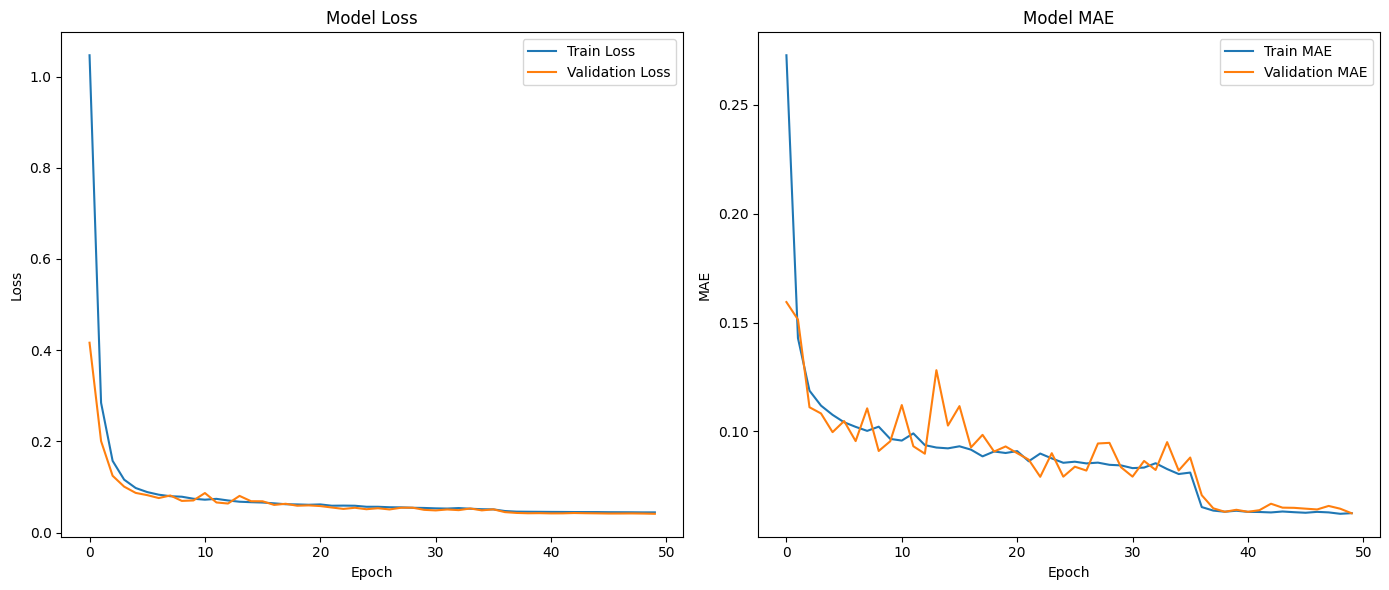

In [57]:

# Creating subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plotting training & validation loss values
ax1.plot(history.history['loss'], label='Train Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper right')

# Plotting training & validation MAE values
ax2.plot(history.history['mae'], label='Train MAE')
ax2.plot(history.history['val_mae'], label='Validation MAE')
ax2.set_title('Model MAE')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('MAE')
ax2.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

In [58]:
# Make predictions on the test set
y_pred = model.predict([X_test_reshaped, X_test])

# Since predictions are typically in an array format, we'll flatten them for easier comparison
y_pred = y_pred.flatten()

124/124 [==============================] - 3s 16ms/step


### Metrics

In [59]:

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 0.062433738137803466
Mean Squared Error (MSE): 0.009734689215438689
R-squared (R²): 0.9922747283443646


### Actual vs Predicted

In [60]:
# Randomly select 50 samples
np.random.seed(42)
indices = np.random.choice(len(y_test), 50, replace=False)

# Get the actual and predicted values for these indices
actual_vs_predicted = pd.DataFrame({
    'Actual': y_test[indices],
    'Predicted': y_pred[indices]
})

# Display the DataFrame
print(actual_vs_predicted)

      Actual  Predicted
0   1.603899   1.910816
1   0.595107   0.599350
2   0.359615   0.361032
3   0.708036   0.678093
4   0.450651   0.433253
5   0.372138   0.502852
6   1.090884   1.032675
7   1.334184   1.269528
8   2.199444   2.315960
9   2.965222   2.907759
10  0.581137   0.579375
11  0.388658   0.366800
12  0.473124   0.484781
13  1.682519   1.701316
14  0.565314   0.539225
15  0.476234   0.528043
16  0.740855   0.766800
17  0.919249   0.859239
18  0.697139   0.677826
19  0.475377   0.492204
20  1.066146   1.134370
21  1.727009   1.769599
22  0.812545   0.765722
23  0.703098   0.741972
24  0.661951   0.579225
25  0.435486   0.496627
26  0.443082   0.464577
27  1.098612   1.044993
28  0.475790   0.514531
29  3.162737   3.099390
30  0.521766   0.553835
31  0.693147   0.745788
32  2.497407   2.551424
33  0.846941   0.810682
34  0.501911   0.477628
35  0.000000   0.017283
36  1.397893   1.305946
37  0.732368   0.745115
38  0.934828   0.911203
39  1.705384   1.754065
40  0.474991   0

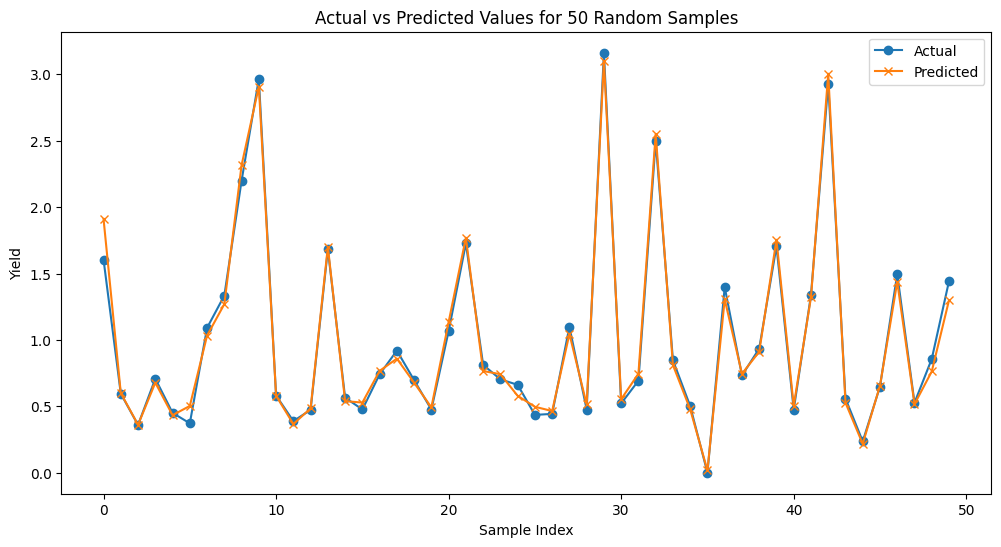

In [61]:
# Plotting the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(actual_vs_predicted['Actual'].values, label='Actual', marker='o')
plt.plot(actual_vs_predicted['Predicted'].values, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values for 50 Random Samples')
plt.xlabel('Sample Index')
plt.ylabel('Yield')
plt.legend(loc='upper right')
plt.show()